In [88]:
from IPython.display import Image
from sklearn import ensemble
from sklearn import tree
from sklearn.feature_selection import RFECV 
from sklearn.model_selection import cross_val_score
import graphviz
import numpy as np
import pandas as pd
import pydotplus
import scipy.stats as stats
import timeit

In [101]:
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
The code for this notebook is hidden for easier reading.
To toggle it on/off, please click <a href="javascript:code_toggle()">here</a>.''')

**PRIMARY SOURCE:** P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7. Fabio Pagnotta, Hossain Mohammad Amran. E-Mail:fabio.pagnotta@studenti.unicam.it, mohammadamra.hossain '@' studenti.unicam.it University Of Camerino

**SECONDARY SOURCE:** [Kaggle](https://www.kaggle.com/uciml/student-alcohol-consumption/data).

# Questions for Mike

- Am I supposed to engineer my features such that they're all categorical for a Classifier and all-continuous for a Regressor?
- Why does model performance decline as information gain/impurity decline and depth increases? 
- Are PCA and PLSR exclusively intended for reducing dimensionality in linear regression models or could I have used them here?
- How do PCA and PLSR differ from RFE/RFECV?
- How would I modify my manual RFECV implementation to consider importance?
- How would I modify sklearn's RFECV implementation 
- Should I re-do the challenge using all of the available features to try to improve model performance?

In [89]:
math = pd.read_csv('C:\\Users\\missn\\Documents\\student-mat.csv')

#Subsetted variables of interest. 
math = math[['absences','age','Dalc','Walc','G1','G2','G3','sex','studytime']]

#Converted the grades from the 20-point scale into percentages.
for column in math[['G1','G2','G3']]:
    math[column]=math[column].map(lambda x: x*5)

#Renamed certain variables for clarity. 
math.rename(columns = {'Dalc':'weekday drinking','G1':'first score','G2':'second score','G3':'final score','studytime':'weekly studying','Walc':'weekend drinking'}, inplace = True)

#Dropped the original features for weekday and weekend alcohol consumption.
math = math.dropna()

#Dropped any null observations.
math = math.dropna()

math.head()

,absences,age,weekday drinking,weekend drinking,first score,second score,final score,sex,weekly studying
0,6,18,1,1,25,30,30,F,2
1,4,17,1,1,25,25,30,F,2
2,10,15,2,3,35,40,50,F,2
3,2,15,1,1,75,70,75,F,3
4,4,16,1,2,30,50,50,F,2


**OUTCOME VARIABLE:**
- Sex

**CATEGORICAL PREDICTOR VARIABLES:**
- Weekly Studying
- Weekday Drinking
- Weekend Drinking

**CONTINUOUS PREDICTOR VARIABLES:**
- Absences
- Age
- First Score
- Second Score
- Final Score

There are 33 variables in the original dataset - I'm focusing on these 9 for this challenge.

# Decision Tree Model

## Criterion: Gini (Impurity)

In [90]:
start_time = timeit.default_timer()

for i in range(1,11,1):
    decision_tree = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = i, random_state = 0)
    X = math.drop('sex',1)
    Y = math['sex']
    decision_tree.fit(X,Y)

    dot_data = tree.export_graphviz(decision_tree, out_file = None, feature_names = X.columns, class_names=['Male', 'Female'], filled=True)
    graph = pydotplus.graph_from_dot_data(dot_data)
    Image(graph.create_png())
    print('Depth: {}'.format(i))
    print('Model Performance: {:.2%}.\n'.format(cross_val_score(decision_tree, X, Y, cv=10).mean()))

print("--- Runtime: %s seconds. ---" % (timeit.default_timer() - start_time))

Depth: 1
Model Performance: 64.38%.

Depth: 2
Model Performance: 70.67%.

Depth: 3
Model Performance: 69.58%.

Depth: 4
Model Performance: 67.61%.

Depth: 5
Model Performance: 66.59%.

Depth: 6
Model Performance: 64.07%.

Depth: 7
Model Performance: 61.08%.

Depth: 8
Model Performance: 60.80%.

Depth: 9
Model Performance: 58.98%.

Depth: 10
Model Performance: 58.76%.

--- Runtime: 13.147514645453725 seconds. ---


### Best-Performing Tree: max_depth = 2

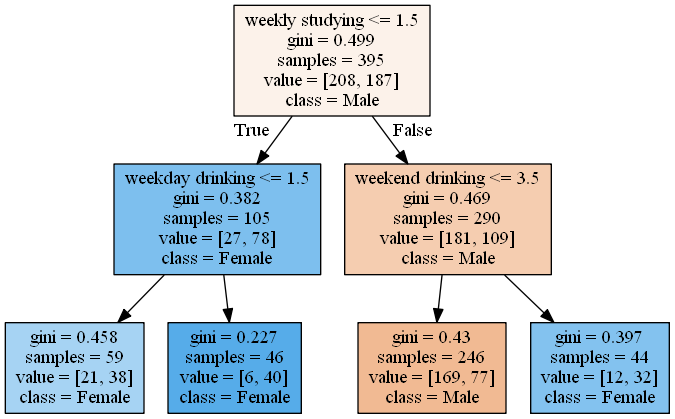

In [91]:
decision_tree = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 2, random_state = 0)
X = math.drop('sex',1)
Y = math['sex']
decision_tree.fit(X,Y)

dot_data = tree.export_graphviz(decision_tree, out_file = None, feature_names = X.columns, class_names=['Male', 'Female'], filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [92]:
start_time = timeit.default_timer()
decision_tree = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 2, random_state = 0)
X = math.drop('sex',1)
Y = math['sex']
decision_tree.fit(X,Y)

dot_data = tree.export_graphviz(decision_tree, out_file = None, feature_names = X.columns, class_names=['Male', 'Female'], filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
print("--- Runtime: %s seconds. ---" % (timeit.default_timer() - start_time))

--- Runtime: 0.21416637337983957 seconds. ---


## Criterion: Entropy (Information Gain)

In [93]:
start_time = timeit.default_timer()

for i in range(1,11,1):
    decision_tree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = i, random_state = 0)
    X = math.drop('sex',1)
    Y = math['sex']
    decision_tree.fit(X,Y)

    dot_data = tree.export_graphviz(decision_tree, out_file = None, feature_names = X.columns, class_names=['Male', 'Female'], filled=True)
    graph = pydotplus.graph_from_dot_data(dot_data)
    Image(graph.create_png())
    print('Depth: {}'.format(i))
    print('Model Performance: {:.2%}.\n'.format(cross_val_score(decision_tree, X, Y, cv=10).mean()))

print("--- Runtime: %s seconds. ---" % (timeit.default_timer() - start_time))

Depth: 1
Model Performance: 64.38%.

Depth: 2
Model Performance: 70.67%.

Depth: 3
Model Performance: 70.14%.

Depth: 4
Model Performance: 68.36%.

Depth: 5
Model Performance: 69.13%.

Depth: 6
Model Performance: 65.85%.

Depth: 7
Model Performance: 67.34%.

Depth: 8
Model Performance: 63.30%.

Depth: 9
Model Performance: 65.32%.

Depth: 10
Model Performance: 63.34%.

--- Runtime: 10.737440660201173 seconds. ---


### Best-Performing Tree: max_depth = 2

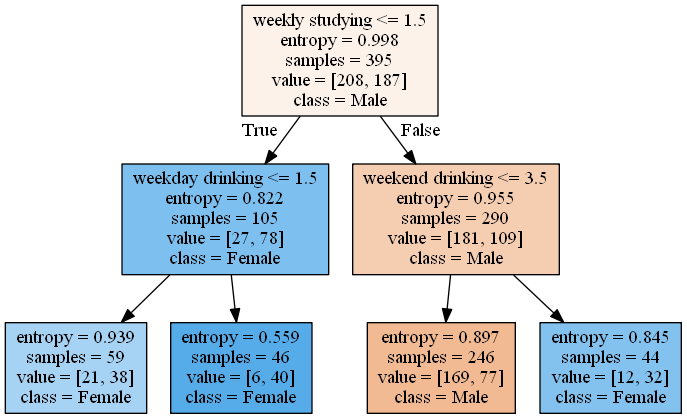

In [94]:
decision_tree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 2, random_state = 0)
X = math.drop('sex',1)
Y = math['sex']
decision_tree.fit(X,Y)

dot_data = tree.export_graphviz(decision_tree, out_file = None, feature_names = X.columns, class_names=['Male', 'Female'], filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [95]:
start_time = timeit.default_timer()

decision_tree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 2, random_state = 0)
X = math.drop('sex',1)
Y = math['sex']
decision_tree.fit(X,Y)

dot_data = tree.export_graphviz(decision_tree, out_file = None, feature_names = X.columns, class_names=['Male', 'Female'], filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

print("--- Runtime: %s seconds. ---" % (timeit.default_timer() - start_time))

--- Runtime: 0.18932843661946208 seconds. ---


# Random Forest Model

## (Manual) Recursive Feature Elimination With Cross-Validation

In [96]:
rfc = ensemble.RandomForestClassifier()
rfc.fit(X, Y)
names_importances = {}
for feature, importance in zip(X.columns, rfc.feature_importances_):
    names_importances[feature] = importance
    names_importances_desc = sorted(names_importances.items(), key=lambda x: x[1], reverse=True)
    names_importances_desc = pd.DataFrame(names_importances_desc, columns=['feature','importance'])

In [97]:
names_importances_desc

,feature,importance
0,second score,0.162602
1,absences,0.139525
2,first score,0.132499
3,weekend drinking,0.126341
4,weekly studying,0.125258
5,final score,0.122369
6,age,0.113900
7,weekday drinking,0.077506


In [98]:
start_time = timeit.default_timer()

X_prime = X[['first score','absences','weekly studying','final score','weekend drinking','age','second score','weekday drinking']]
features = list(X_prime.columns)

for i in range(len(features),0,-1): 
    X = X[features[:i+1]]
    print('Run Number: {}.\n'.format(len(features)-i+1))
    print('Number of Features: {}.\n'.format(i))
    print('Dropped Feature(s): \n{}\n'.format(features[i:]))
    print("Model Performance: {:.2%}.\n".format(cross_val_score(rfc, X_prime, Y, cv=10).mean()))
    
print("--- Runtime: %s seconds. ---" % (timeit.default_timer() - start_time))

Run Number: 1.

Number of Features: 8.

Dropped Feature(s): 
[]

Model Performance: 66.09%.

Run Number: 2.

Number of Features: 7.

Dropped Feature(s): 
['weekday drinking']

Model Performance: 63.31%.

Run Number: 3.

Number of Features: 6.

Dropped Feature(s): 
['second score', 'weekday drinking']

Model Performance: 61.53%.

Run Number: 4.

Number of Features: 5.

Dropped Feature(s): 
['age', 'second score', 'weekday drinking']

Model Performance: 62.56%.

Run Number: 5.

Number of Features: 4.

Dropped Feature(s): 
['weekend drinking', 'age', 'second score', 'weekday drinking']

Model Performance: 64.32%.

Run Number: 6.

Number of Features: 3.

Dropped Feature(s): 
['final score', 'weekend drinking', 'age', 'second score', 'weekday drinking']

Model Performance: 65.80%.

Run Number: 7.

Number of Features: 2.

Dropped Feature(s): 
['weekly studying', 'final score', 'weekend drinking', 'age', 'second score', 'weekday drinking']

Model Performance: 59.54%.

Run Number: 8.

Number o

## sklearn Recursive Feature Elimination With Cross-Validation

In [99]:
def iterative_RFC(X,Y):
    start_time = timeit.default_timer()
    rfc = ensemble.RandomForestClassifier()
    rfecv = RFECV(estimator=rfc, step=1, cv=10, scoring='accuracy')
    rfecv.fit(X, Y)
    print("Optimal Number of Features: {}.".format(rfecv.n_features_))
    print("Model Performance: {:.2%}.".format(rfecv.grid_scores_.mean()))
    print("--- Runtime: %s seconds. ---" % (timeit.default_timer() - start_time))

In [100]:
X=X
Y=Y
iterative_RFC(X,Y)

Optimal Number of Features: 1.
Model Performance: 50.80%.
--- Runtime: 0.4024530894326972 seconds. ---


**The Random Forest model takes approximately twice as long as the Decision Tree models. My manual implementations of recursive feature elimination take the longest for both models, but interestingly don't take as long for the former as they do for the latter.**